## Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import statsmodels.formula.api as smformula
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the combined dataset and inspect it

In [2]:
os.chdir('C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya')
print(os.getcwd())

C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya


#### Drop rows where envProduction is NaN

In [3]:
# print number of rows in the dataset
data = pd.read_csv('combined4.csv', index_col=0)
print(len(data))
# drop rows where envProduction is NaN 
data.dropna(subset=['envProduction'], inplace=True)
print(len(data))

9243
6511


#### Drop rows where -98/-99 codes occur

In [4]:
col_list = ['Neg_wellb_1', 'Neg_wellb_2', 'Neg_wellb_3', 'Neg_wellb_4', 'Pos_wellb_1', 'Pos_wellb_2', 'Pos_wellb_3', 'Pos_wellb_4',
             'Fut_Gen_1', 'Fut_Gen_2', 'Fut_Gen_3', 'Fut_Gen_4', 'Gov_resp_1', 'Gov_resp_2', 'Gov_resp_3', 'Gov_resp_4',
             'Com_coord_1', 'Com_coord_2', 'Com_coord_3', 'Com_coord_4',
             'Risk_social_1', 'Risk_social_2', 'Risk_social_3', 'Risk_social_4', 'Risk_punish_1', 'Risk_punish_2', 'Risk_punish_3', 'Risk_punish_4',
             'Com_trust1_1', 'Com_trust1_2', 'Com_trust1_3', 'Com_trust1_4', 'Com_trust2_1', 'Com_trust2_2', 'Com_trust2_3', 'Com_trust2_4',
             'Trust_govt_1', 'Trust_govt_2', 'Trust_govt_3', 'Trust_govt_4',
             'Trust_natpark_1', 'Trust_natpark_2', 'Trust_natpark_3', 'Trust_natpark_4', 'Depend_on_others_1', 'Depend_on_others_2', 'Depend_on_others_3', 'Depend_on_others_4',
             'Effects_on_others_1', 'Effects_on_others_2', 'Effects_on_others_3', 'Effects_on_others_4',
             'Effects_on_next_gen_1', 'Effects_on_next_gen_2', 'Effects_on_next_gen_3', 'Effects_on_next_gen_4']
for col in col_list:
    data[col] = data[col].replace(-98, np.NaN)
    data[col] = data[col].replace(-99, np.NaN)

In [5]:
np.unique([x[:-2] for x in data.columns.values])

array(['Age', 'Com_coord', 'Com_trust1', 'Com_trust2', 'Depend_on_others',
       'Education', 'Effects_on_next_gen', 'Effects_on_others', 'Fut_Gen',
       'Game', 'Game_goal_1', 'Game_goal_2', 'Game_goal_3', 'Game_goal_4',
       'Gender', 'Gov_resp', 'Neg_wellb', 'Pos_wellb', 'Rel1', 'Rel2',
       'Rel3', 'RespHOH', 'Risk_punish', 'Risk_social', 'Roun',
       'Treatmen', 'Trust_govt', 'Trust_natpark', 'count', 'envProducti',
       'primary_farming', 'primary_priv_tour', 'secondary_farming',
       'secondary_priv_tour', 'subsi'], dtype='<U19')

In [6]:
for col in ['Com_coord', 'Com_trust1', 'Com_trust2', 'Depend_on_others', 'Effects_on_next_gen', 'Effects_on_others', 'Fut_Gen',
            'Gov_resp', 'Neg_wellb', 'Pos_wellb', 'Risk_punish', 'Risk_social', 'Trust_govt', 'Trust_natpark', 
            'primary_farming', 'primary_priv_tour', 'secondary_farming', 'secondary_priv_tour']:
    data.dropna(subset=[col+'_1', col+'_2', col+'_3', col+'_4'], inplace=True, how='all')
# print size of the data
len(data)

6511

#### Box-plots showing country-wise distribution of the environmental production outcome

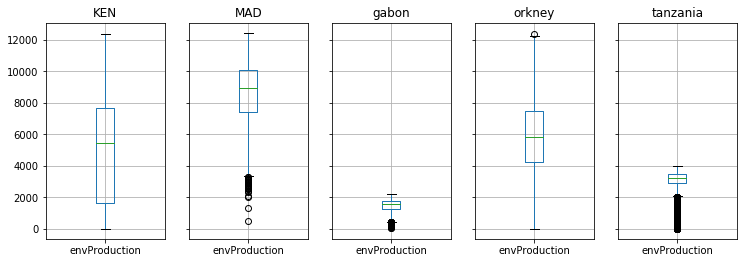

In [7]:
data[['envProduction', 'country']].groupby('country').boxplot(figsize=(12,4), layout=(1,5))
plt.show()

## Compute group statistics (mean, variance, min, max)

In [8]:
for col in ['Age', 'Education', 'Gender', 'Com_coord', 'Com_trust1', 'Com_trust2', 'Depend_on_others',
           'Effects_on_next_gen', 'Effects_on_others', 'Fut_Gen',
           'Gov_resp', 'Neg_wellb', 'Pos_wellb', 'Risk_social', 'Risk_punish', 'Trust_govt', 'Trust_natpark',
           'primary_farming', 'primary_priv_tour', 'secondary_farming', 'secondary_priv_tour']:
    data[col+'_mean'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].mean(axis=1)
    data[col+'_var'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].var(axis=1, ddof=0)

for col in ['Game_goal_1', 'Game_goal_2', 'Game_goal_3', 'Game_goal_4']:
    # note that inner index is player number
    data[col+'_mean'] = data[['Game_goal_1_'+col[-1], 'Game_goal_2_'+col[-1], 'Game_goal_3_'+col[-1], 'Game_goal_4_'+col[-1]]].mean(axis=1)
    data[col+'_var'] = data[['Game_goal_1_'+col[-1], 'Game_goal_2_'+col[-1], 'Game_goal_3_'+col[-1], 'Game_goal_4_'+col[-1]]].var(axis=1, ddof=0)


data['rel_mean'] = data[['Rel1_1', 'Rel2_1', 'Rel3_1', 'Rel1_2', 'Rel2_2', 'Rel3_2',
                       'Rel1_3', 'Rel2_3', 'Rel3_3', 'Rel1_4', 'Rel2_4', 'Rel3_4']].mean(axis=1)
data['rel_var'] = data[['Rel1_1', 'Rel2_1', 'Rel3_1', 'Rel1_2', 'Rel2_2', 'Rel3_2',
                       'Rel1_3', 'Rel2_3', 'Rel3_3', 'Rel1_4', 'Rel2_4', 'Rel3_4']].var(axis=1, ddof=0)

#### One-hot encode the country column

In [9]:
# Get one hot encoding of country column
one_hot = pd.get_dummies(data['country'])
# Join the encoded dataframe
data = pd.concat([data, one_hot], axis=1)

## Compute column-wise z-scores (separately for every subset of dataset)

In [10]:
col_list = ['Age_mean', 'Age_var', 'Education_mean', 'Education_var', 'Gender_mean', 'Gender_var', 'Com_coord_mean', 
            'Com_coord_var', 'Com_trust1_mean', 'Com_trust1_var', 'Com_trust2_mean', 'Com_trust2_var', 'Depend_on_others_mean', 
            'Depend_on_others_var', 'Effects_on_next_gen_mean', 'Effects_on_next_gen_var', 'Effects_on_others_mean', 
            'Effects_on_others_var', 'Fut_Gen_mean', 'Fut_Gen_var', 'Game_goal_1_mean', 'Game_goal_1_var', 'Game_goal_2_mean', 
            'Game_goal_2_var', 'Game_goal_3_mean', 'Game_goal_3_var', 'Game_goal_4_mean', 'Game_goal_4_var', 
            'Gov_resp_mean', 'Gov_resp_var', 'Neg_wellb_mean', 'Neg_wellb_var', 'Pos_wellb_mean', 'Pos_wellb_var',
            'Risk_social_mean', 'Risk_social_var', 'Risk_punish_mean', 'Risk_punish_var', 'Trust_govt_mean', 'Trust_govt_var', 
            'Trust_natpark_mean', 'Trust_natpark_var', 'primary_farming_mean', 'primary_farming_var', 'primary_priv_tour_mean', 
            'primary_priv_tour_var', 'secondary_farming_mean', 'secondary_farming_var', 'secondary_priv_tour_mean', 
            'secondary_priv_tour_var', 'rel_mean', 'rel_var', 'envProduction']
for col in col_list:
    data['z_'+col] = data.groupby('country')[col].transform(lambda x: scale(x.astype(float)))

In [11]:
exceptions = ['primary_priv_tour_mean', 'primary_priv_tour_var', 'primary_priv_tour_min', 'primary_priv_tour_max',
       'secondary_priv_tour_mean', 'secondary_priv_tour_var', 'secondary_priv_tour_min', 'secondary_priv_tour_max']

In [12]:
# define explanatory and response variables
explanatory_var = ['z_' + x for x in ['Age_mean', 'Age_var', 'Education_mean', 'Education_var', 'Gender_mean', 'Gender_var', 
            'primary_farming_mean', 'primary_farming_var', 'secondary_farming_mean', 'secondary_farming_var', 
            'Com_coord_mean', 'Com_coord_var', 'Com_trust1_mean', 'Com_trust1_var', 'Com_trust2_mean', 'Com_trust2_var', 'Depend_on_others_mean', 
            'Depend_on_others_var', 'Effects_on_next_gen_mean', 'Effects_on_next_gen_var', 'Effects_on_others_mean', 
            'Effects_on_others_var', 'Fut_Gen_mean', 'Fut_Gen_var', 'Game_goal_1_mean', 'Game_goal_1_var', 'Game_goal_2_mean', 
            'Game_goal_2_var', 'Game_goal_3_mean', 'Game_goal_3_var', 'Game_goal_4_mean', 'Game_goal_4_var', 
            'Gov_resp_mean', 'Gov_resp_var', 'Neg_wellb_mean', 'Neg_wellb_var', 'Pos_wellb_mean', 'Pos_wellb_var',
            'Risk_social_mean', 'Risk_social_var', 'Risk_punish_mean', 'Risk_punish_var', 'Trust_govt_mean', 'Trust_govt_var', 
            'Trust_natpark_mean', 'Trust_natpark_var', 'rel_mean', 'rel_var']]+['subsidy']

response_var = 'z_envProduction'

## Correlation heat-map for explanatory variables

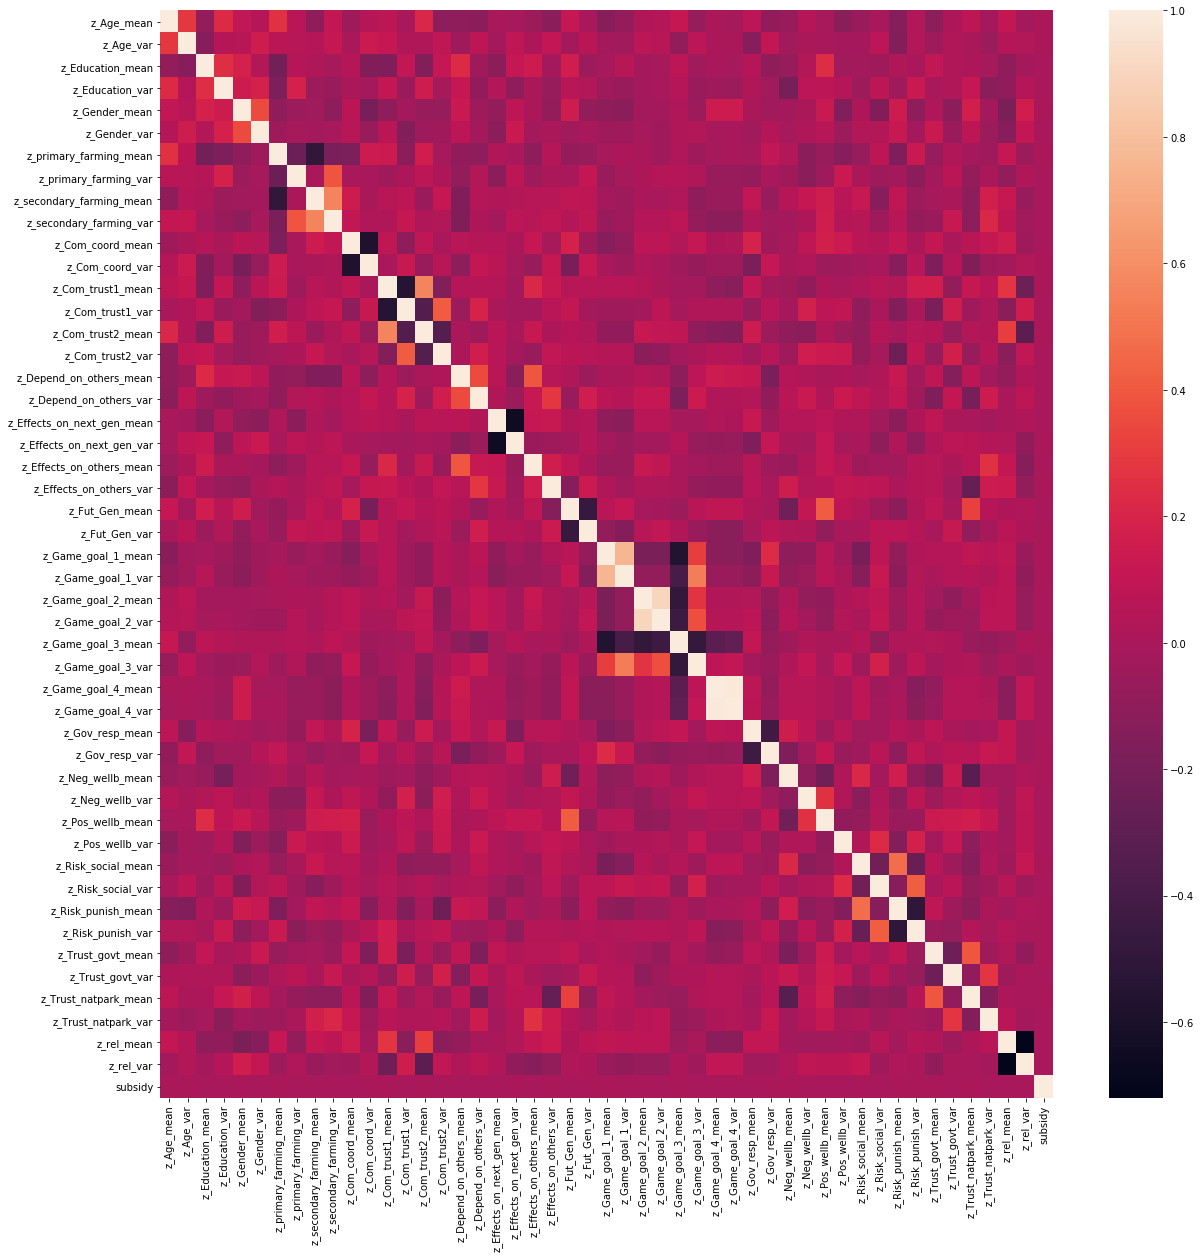

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data[explanatory_var].corr(), ax=ax)

#### Correlation between explanatory variables and response variable

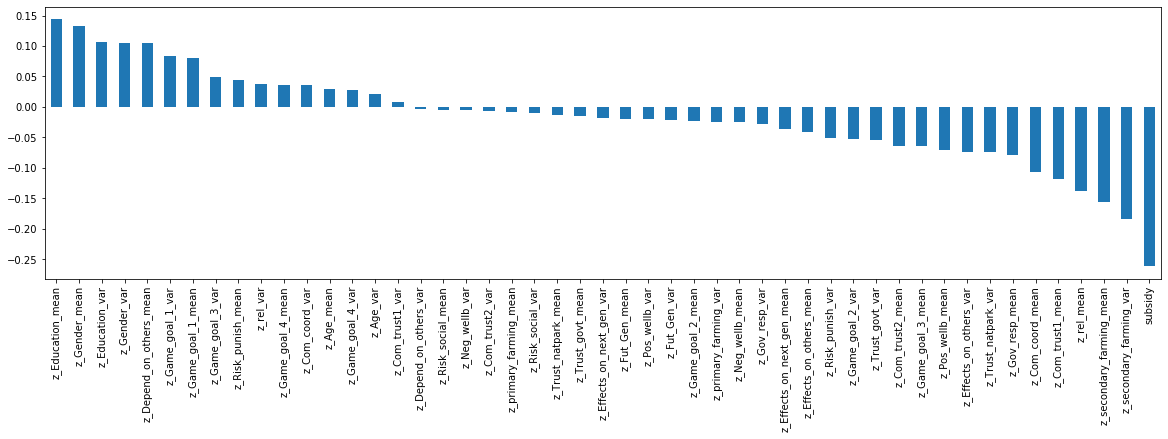

In [14]:
data[explanatory_var+[response_var]].corr()[response_var].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(20,5))

In [15]:
data[explanatory_var].corr().unstack().sort_values(ascending=False)[len(explanatory_var):]

z_Game_goal_4_mean          z_Game_goal_4_var             0.985839
z_Game_goal_4_var           z_Game_goal_4_mean            0.985839
z_Game_goal_2_mean          z_Game_goal_2_var             0.905652
z_Game_goal_2_var           z_Game_goal_2_mean            0.905652
z_Game_goal_1_mean          z_Game_goal_1_var             0.758874
                                                            ...   
z_Com_coord_var             z_Com_coord_mean             -0.571838
z_Effects_on_next_gen_mean  z_Effects_on_next_gen_var    -0.657102
z_Effects_on_next_gen_var   z_Effects_on_next_gen_mean   -0.657102
z_rel_mean                  z_rel_var                    -0.719298
z_rel_var                   z_rel_mean                   -0.719298
Length: 2352, dtype: float64

## OLS regression analysis

In [16]:
# drop duplicate rows
print(len(data))
data.drop_duplicates(inplace=True)
print(len(data))

6511
6511


In [17]:
# write formula
formula = response_var + ' ~ '
for var in explanatory_var:
    formula += var + ' + '
formula = formula[:-3]

In [18]:
# define and fit model
model = smformula.ols(formula, data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        z_envProduction   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     36.90
Date:                Sat, 27 Mar 2021   Prob (F-statistic):          5.46e-303
Time:                        23:30:47   Log-Likelihood:                -8435.5
No. Observations:                6511   AIC:                         1.697e+04
Df Residuals:                    6461   BIC:                         1.731e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### ANOVA table (F-statistic and p-value)

In [19]:
table = sm.stats.anova_lm(results, typ=2) # Type 2 ANOVA DataFrame
print(table)

                                 sum_sq      df           F         PR(>F)
z_Age_mean                     9.438191     1.0   11.986597   5.393165e-04
z_Age_var                     15.129257     1.0   19.214309   1.186849e-05
z_Education_mean              54.595736     1.0   69.337133   1.003591e-16
z_Education_var                5.637555     1.0    7.159752   7.474553e-03
z_Gender_mean                 22.479867     1.0   28.549657   9.444860e-08
z_Gender_var                  21.101805     1.0   26.799505   2.325113e-07
z_primary_farming_mean         2.786548     1.0    3.538944   5.998855e-02
z_primary_farming_var          1.048965     1.0    1.332196   2.484575e-01
z_secondary_farming_mean      23.742328     1.0   30.152995   4.144726e-08
z_secondary_farming_var       27.809166     1.0   35.317920   2.946324e-09
z_Com_coord_mean               1.605303     1.0    2.038751   1.533838e-01
z_Com_coord_var               12.934739     1.0   16.427248   5.114659e-05
z_Com_trust1_mean        

## Visualizing coefficients and beta coefficients

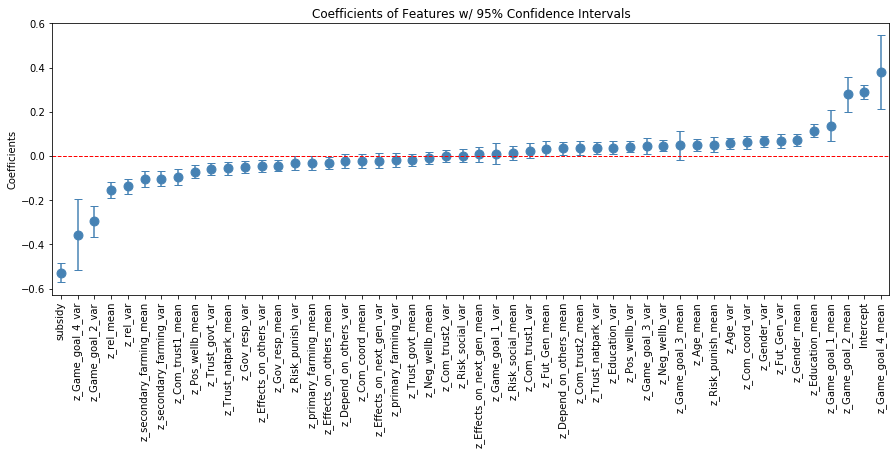

In [20]:
# Create dataframe of results summary 
coef_df = pd.DataFrame(results.summary().tables[1].data)
# Add column names
coef_df.columns = coef_df.iloc[0]
# Drop the extra row with column labels
coef_df=coef_df.drop(0)
# Set index to variable names 
coef_df = coef_df.set_index(coef_df.columns[0])
# Change datatype from object to float
coef_df = coef_df.astype(float)
# Get errors; (coef - lower bound of conf interval)
errors = coef_df['coef'] - coef_df['[0.025']
# Append errors column to dataframe
coef_df['errors'] = errors
# Sort values by coef ascending
coef_df = coef_df.sort_values(by=['coef'])
# Plot Coefficients
# x-labels
variables = list(coef_df.index.values)
# Add variables column to dataframe
coef_df['variables'] = variables
# Set sns plot style back to 'poster'
# This will make bars wide on plot
# Define figure, axes, and plot
fig, ax = plt.subplots(figsize=(15,5))
# Error bars for 95% confidence interval
# Can increase capsize to add whiskers
coef_df.plot(x='variables', y='coef', kind='bar',
             ax=ax, color='none', 
             ecolor='steelblue',capsize=4,
             yerr='errors', legend=False)
# Set title & labels
plt.title('Coefficients of Features w/ 95% Confidence Intervals')
ax.set_ylabel('Coefficients')
ax.set_xlabel('')
# Coefficients
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='o', s=80, 
           y=coef_df['coef'], color='steelblue')

# Line to define zero on the y-axis
ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
plt.show()

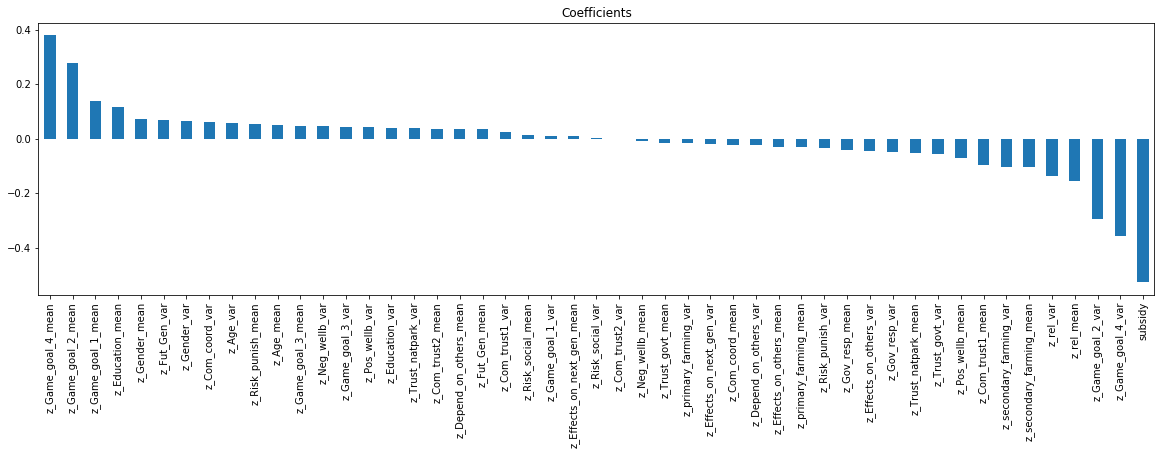

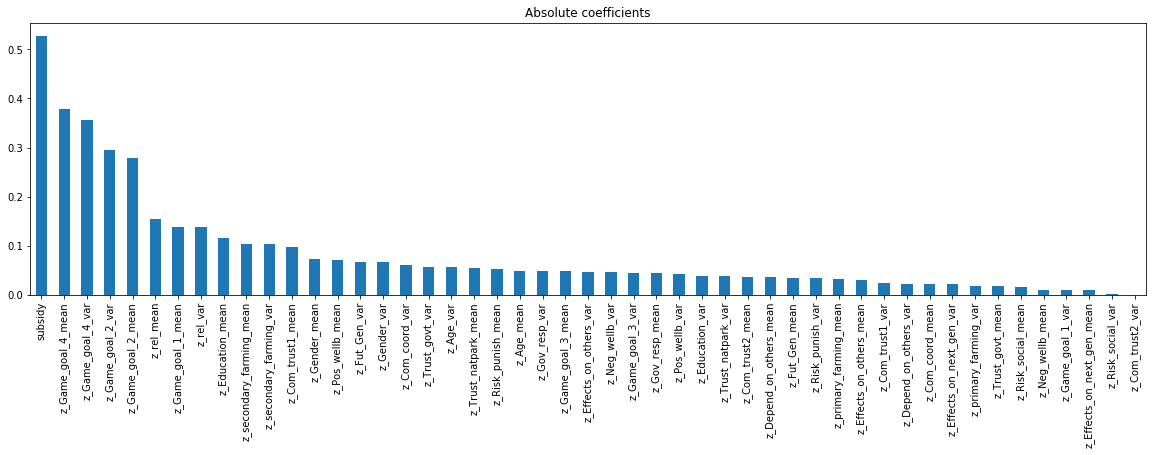

In [21]:
# plot coefficients
plt.figure(figsize=(20,5))
plt.title('Coefficients')
results.params.iloc[1:].sort_values(ascending=False).plot(kind='bar')
plt.show()

# plot absolute coefficients
plt.figure(figsize=(20,5))
plt.title('Absolute coefficients')
results.params.iloc[1:].abs().sort_values(ascending=False).plot(kind='bar')
plt.show()

## Heteroscedasticity Plot

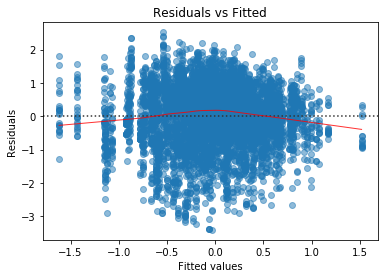

In [22]:
# model fitted values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, data[response_var], data=data[explanatory_var],
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

## Reduction in R2 if a variable is removed

In [23]:
orig_r2 = results.rsquared
for var in explanatory_var:
    temp_explanatory_var = explanatory_var.copy()
    temp_explanatory_var.remove(var)
    formula = response_var + ' ~ '
    for temp_var in temp_explanatory_var:
        formula += temp_var + ' + '
    formula = formula[:-3]
    temp_model = smformula.ols(formula, data=data).fit()
    print(var, temp_model.rsquared-results.rsquared)

z_Age_mean -0.0014495762051253136
z_Age_var -0.0023236457014923495
z_Education_mean -0.008385153666843448
z_Education_var -0.0008658509301676665
z_Gender_mean -0.003452598235453075
z_Gender_var -0.0032409468903372707
z_primary_farming_mean -0.0004279754116718326
z_primary_farming_var -0.00016110662236645812
z_secondary_farming_mean -0.003646494842628467
z_secondary_farming_var -0.00427110516801088
z_Com_coord_mean -0.00024655247384353096
z_Com_coord_var -0.001986597875499374
z_Com_trust1_mean -0.0031797712875044626
z_Com_trust1_var -0.00022165137622731645
z_Com_trust2_mean -0.00059428687361196
z_Com_trust2_var -8.007954965805197e-09
z_Depend_on_others_mean -0.0006269764836595026
z_Depend_on_others_var -0.0002749495144802605
z_Effects_on_next_gen_mean -2.9913127382319438e-05
z_Effects_on_next_gen_var -0.00018075463208866438
z_Effects_on_others_mean -0.0005740425855019771
z_Effects_on_others_var -0.0014685812461142644
z_Fut_Gen_mean -0.0004739851157159469
z_Fut_Gen_var -0.002350484227779

## Relative weights analysis

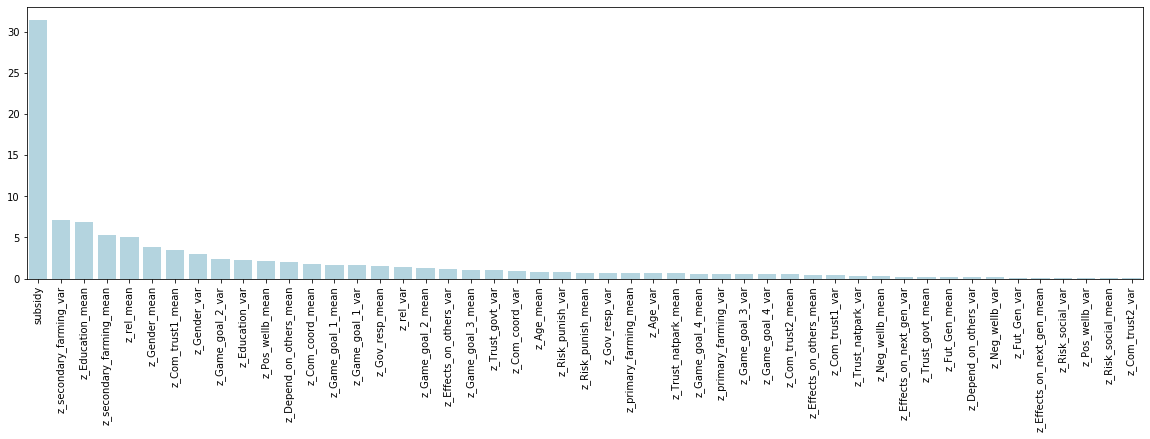

In [24]:
num_drivers = len(explanatory_var)
# Get a correlation between all of the dependent and independent variables.
corr_matrix = data[[response_var]+explanatory_var].apply(pd.to_numeric, errors = 'coerce').corr()
corr_Xs = corr_matrix.iloc[1:, 1:].copy()
corr_Xy = corr_matrix.iloc[1:, 0].copy()
# Create orthogonal predictors using eigenvectors and eigenvalues on the correlation matrix, creating a diagonal matrix
# of the square root of eigenvalues. This gets around the issue of multi-collinearity.
w_corr_Xs, v_corr_Xs = np.linalg.eig(corr_Xs)
diag_idx = np.diag_indices(len(corr_Xs))
diag = np.zeros((num_drivers, num_drivers), float)
diag[diag_idx] = w_corr_Xs
delta = np.sqrt(diag)
# Multiply the eigenvector matrix and its transposition. This allows us to treat X as the set of dependent variables, 
# regressing X onto matrix Z — itself the orthogonal counterpart of X having the least squared error. To get the partial 
# effect of each independent variable, we apply matrix multiplication to the inverse and correlation matricies.
coef_xz = v_corr_Xs @ delta @ v_corr_Xs.transpose()
coef_yz = np.linalg.inv(coef_xz) @ corr_Xy
# We then calculate the relative weight as the multiplication of the matrix in Step 2 and step 3. 
# The normalized version is then the percentage of r2 that these account for.
# Also, the sum of the squares of coef_yz above should add up to the total R2
r2 = sum(np.square(coef_yz))
raw_relative_weights = np.square(coef_xz) @ np.square(coef_yz)
normalized_relative_weights = (raw_relative_weights/r2)*100
idx = np.argsort(normalized_relative_weights)[::-1]
plt.figure(figsize=(20,5))
sns.barplot(x=corr_matrix.columns[1:][idx], y=np.sort(normalized_relative_weights)[::-1], color="lightblue")
plt.xticks(rotation=90)
plt.show()

## Scatter/regression plots for mean response_var grouped by explanatory variable

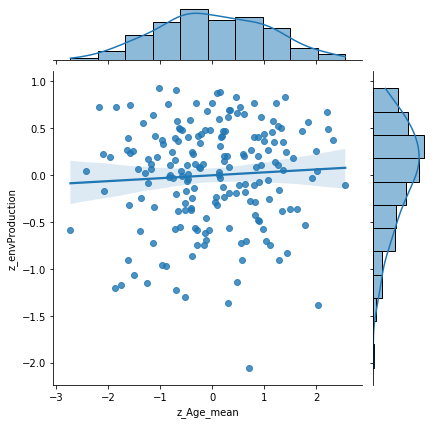

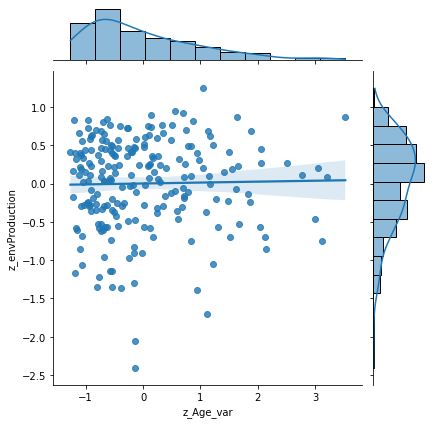

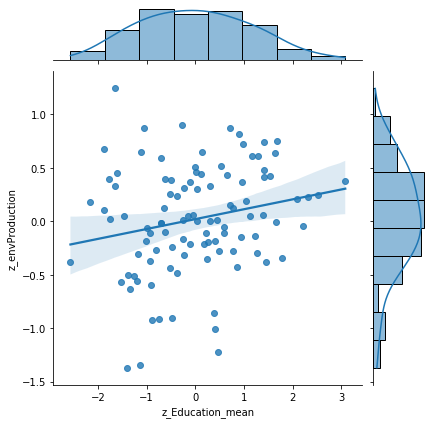

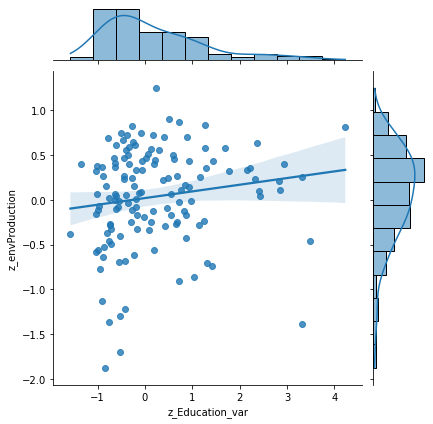

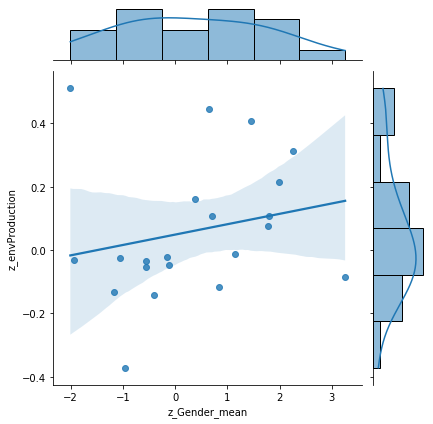

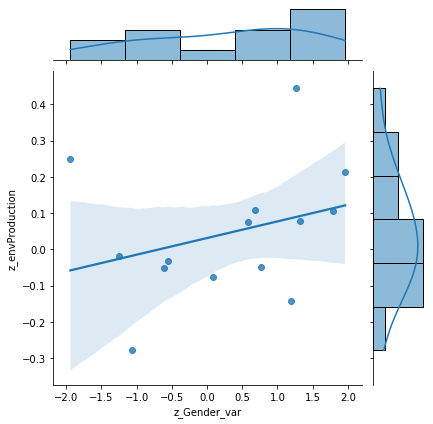

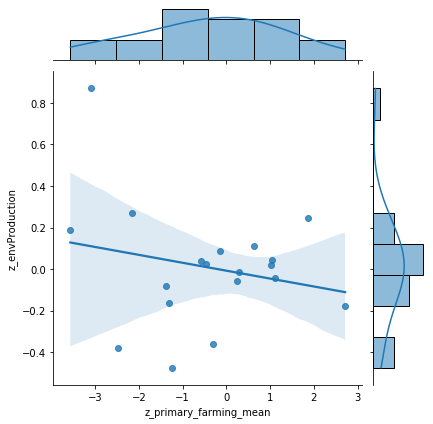

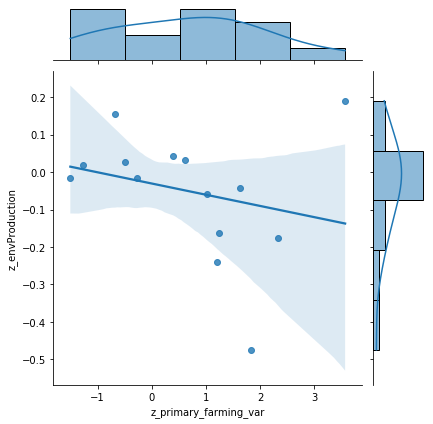

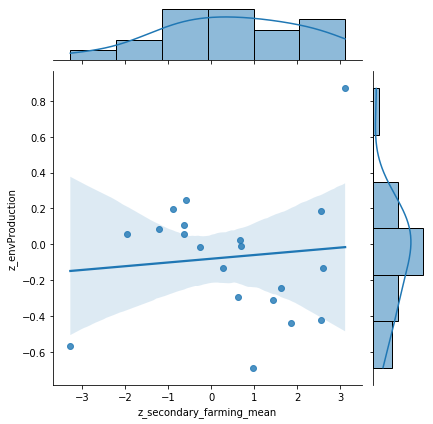

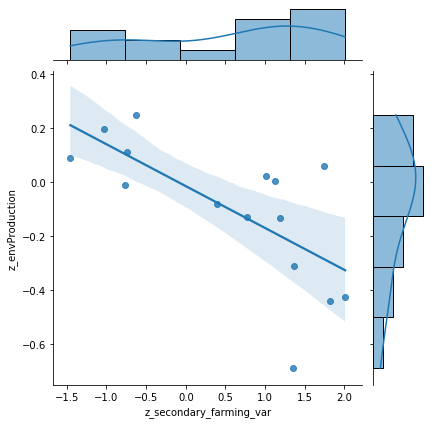

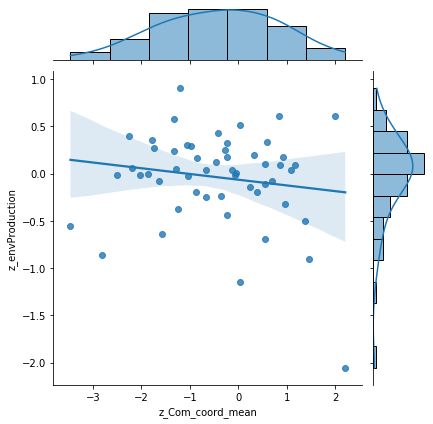

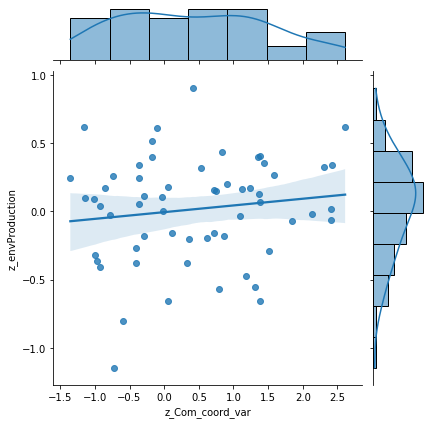

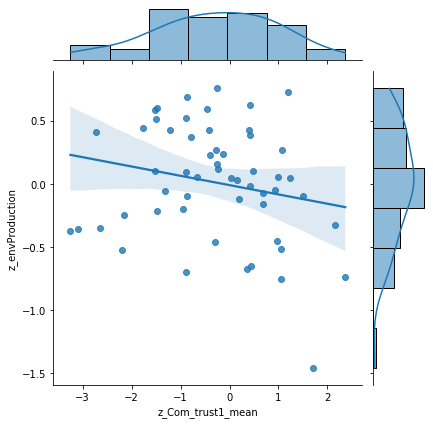

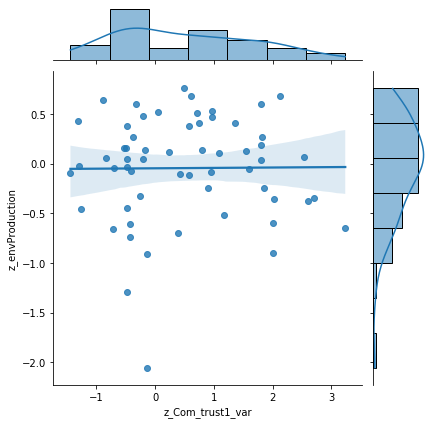

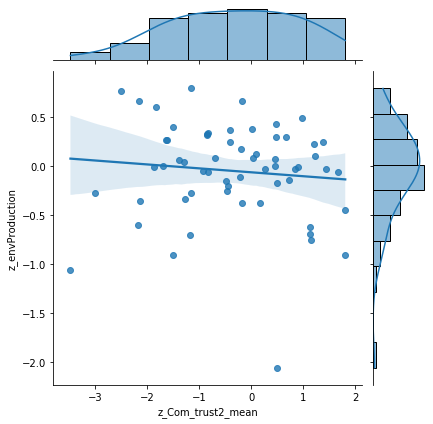

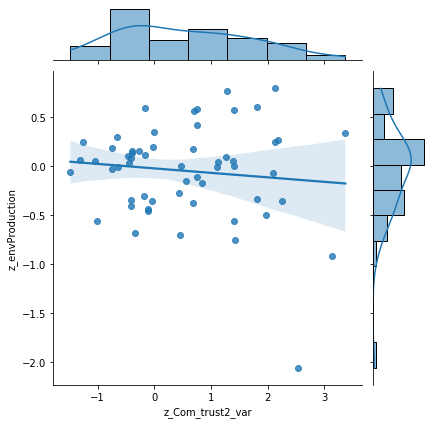

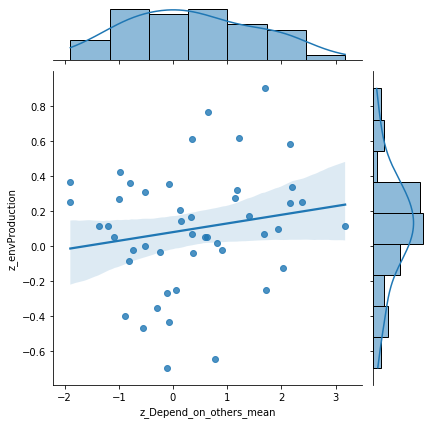

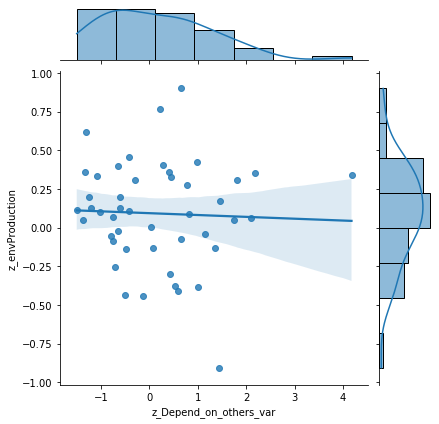

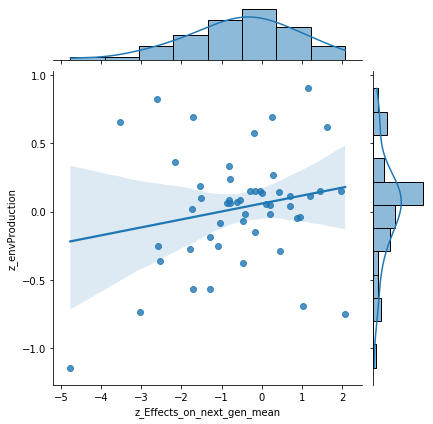

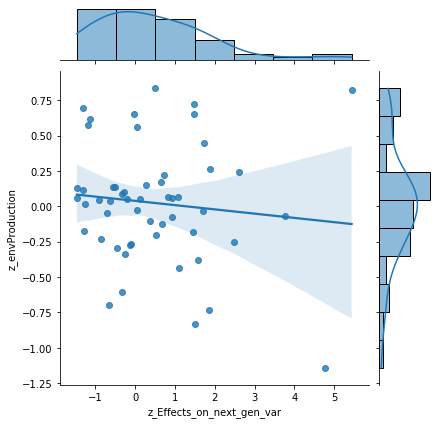

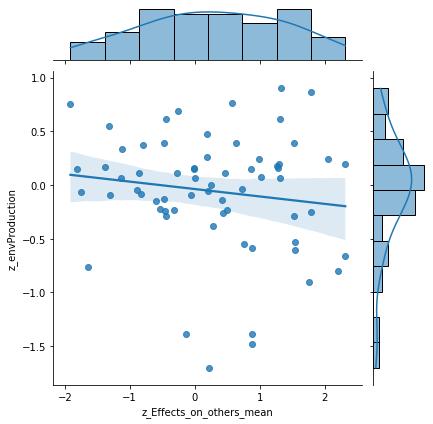

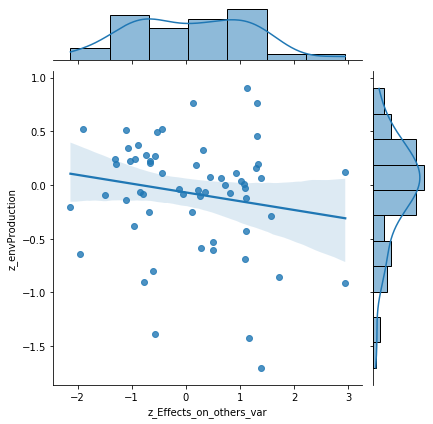

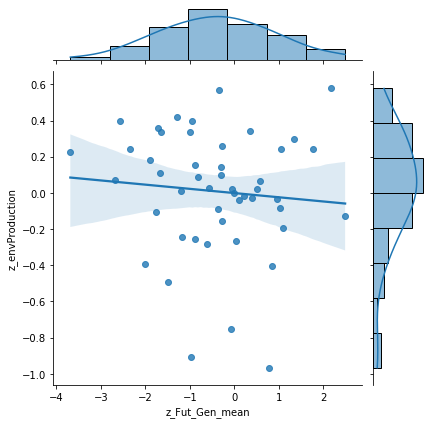

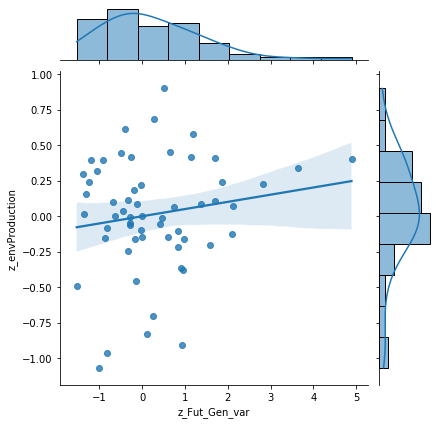

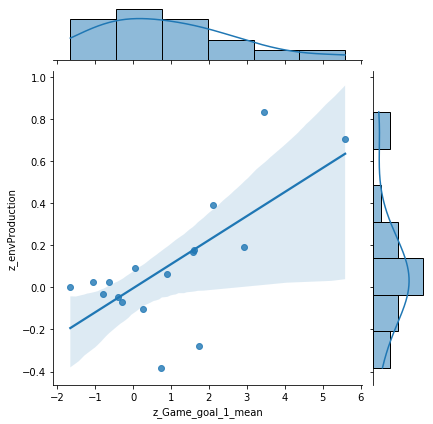

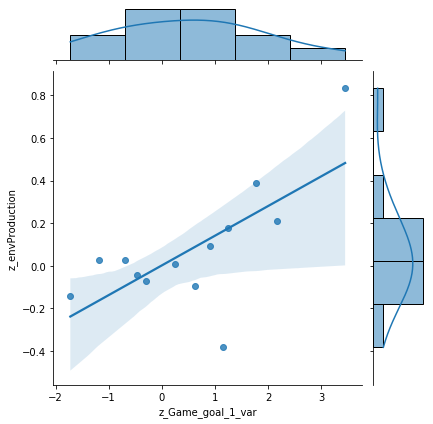

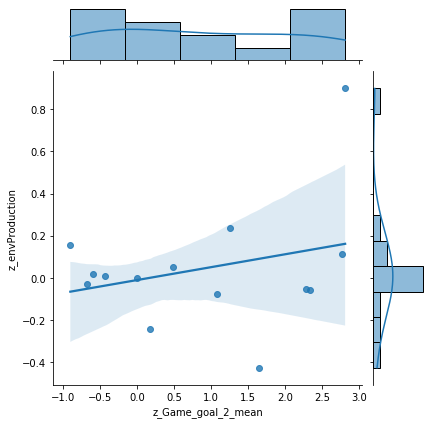

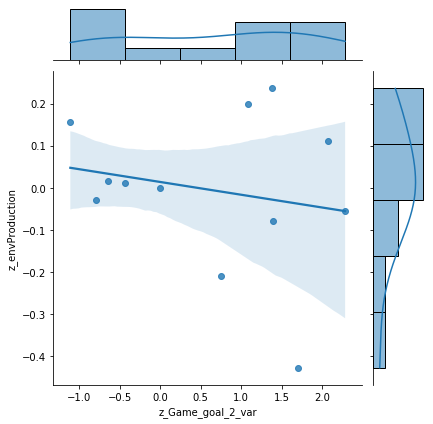

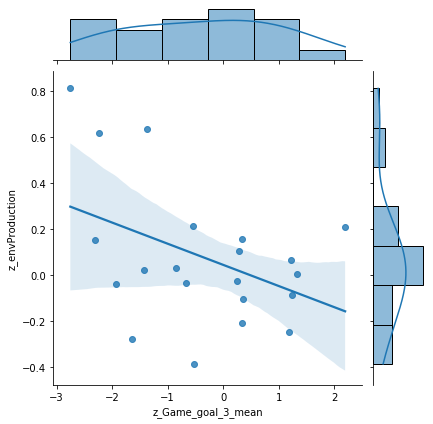

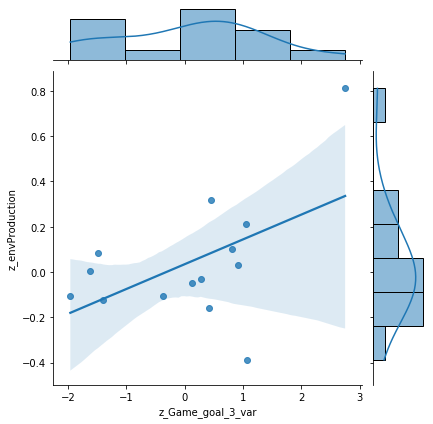

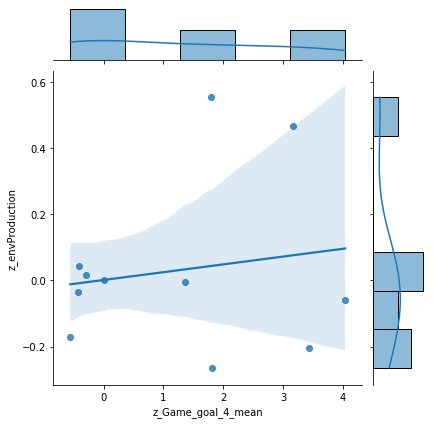

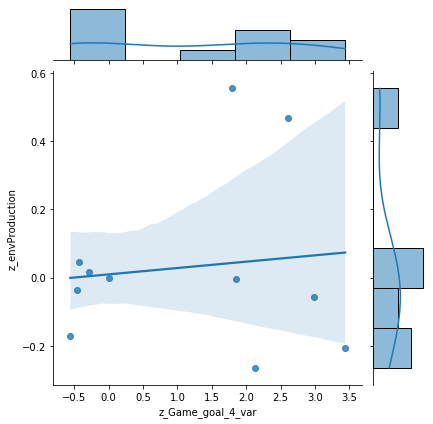

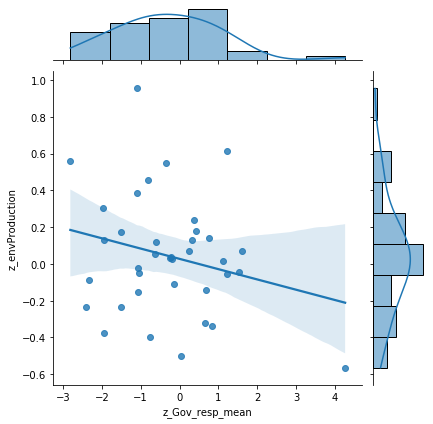

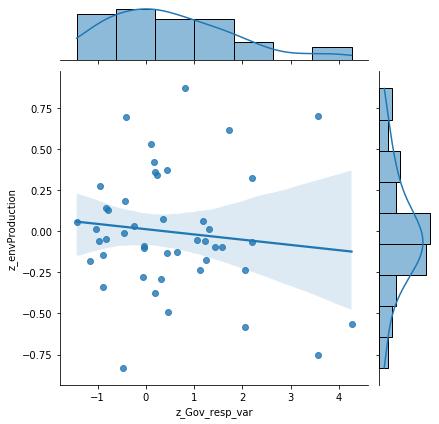

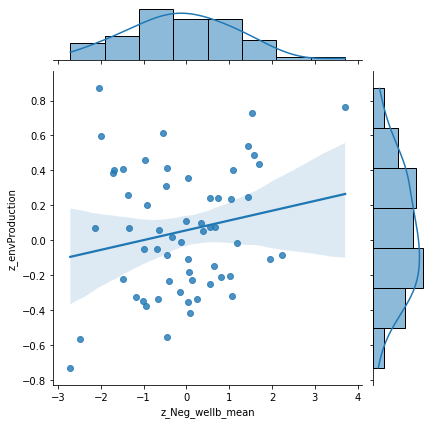

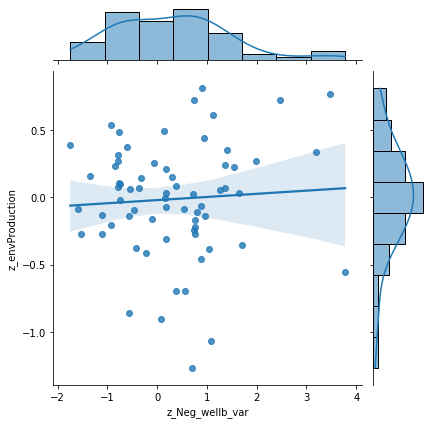

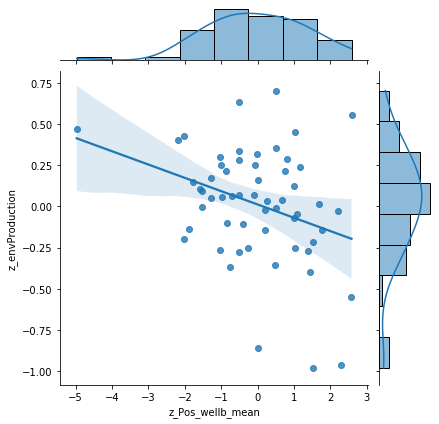

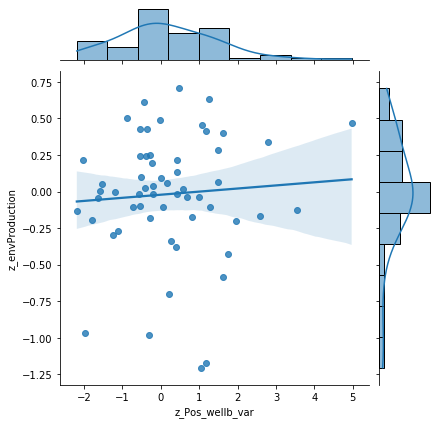

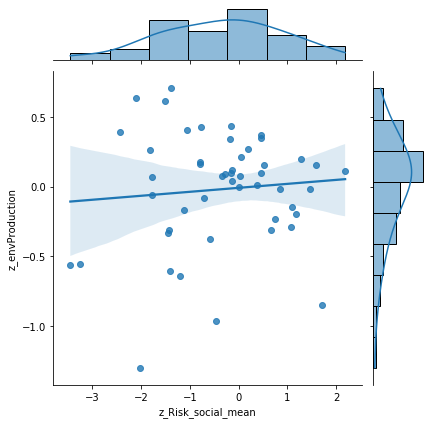

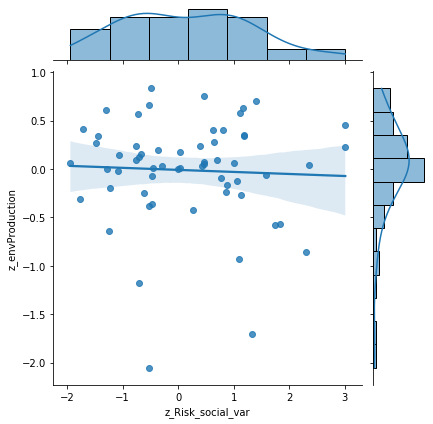

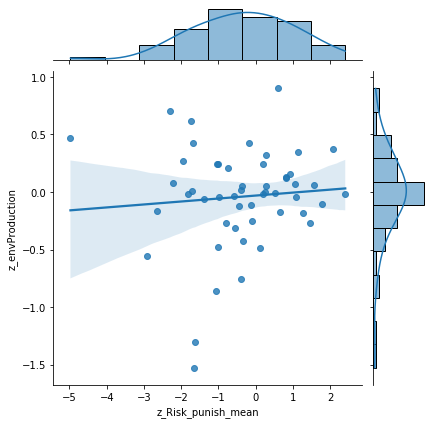

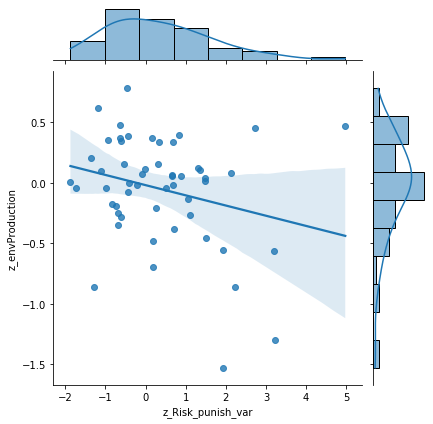

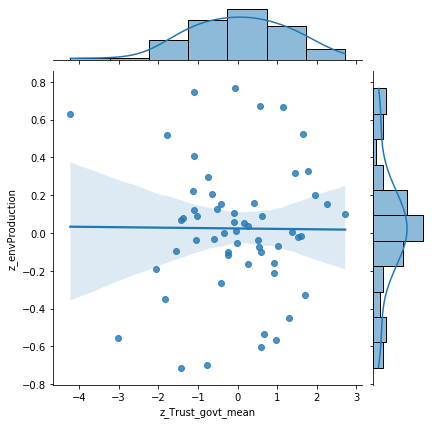

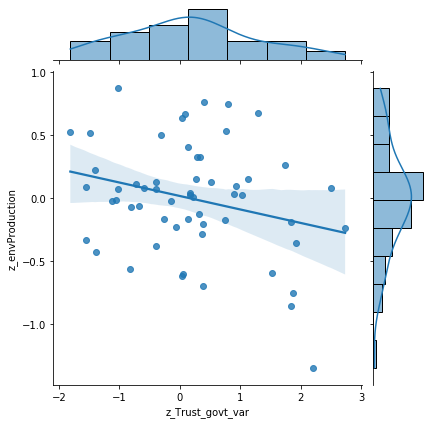

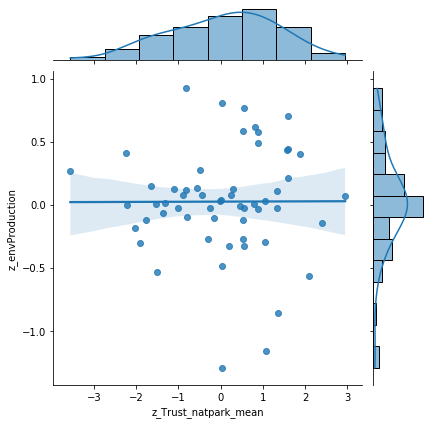

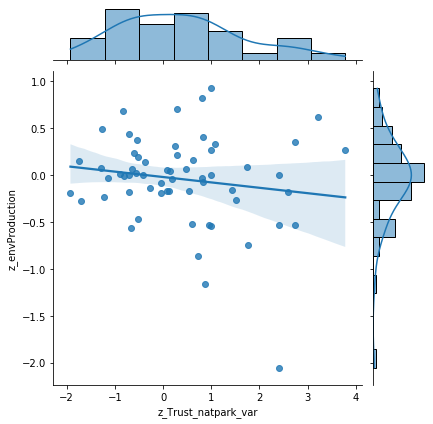

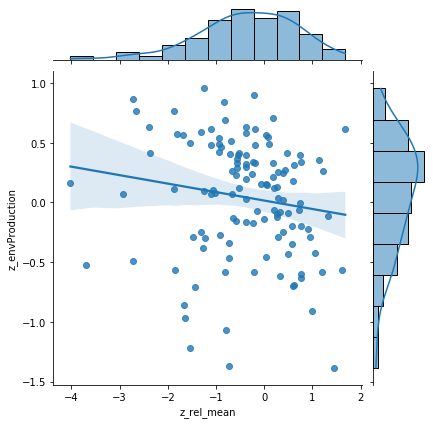

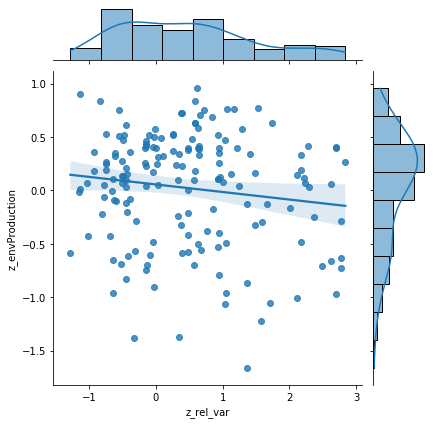

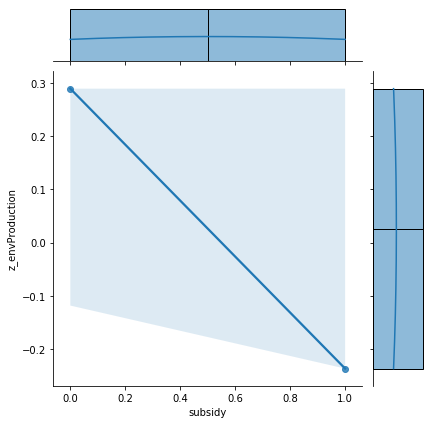

In [25]:
for var in explanatory_var:
    df = data[[var, response_var]].groupby(var).mean().reset_index()
    sns.jointplot(x=var, y=response_var, data=df, kind='reg')
    plt.show()

## Moving average and cubic regression plot for response_var against explanatory variable

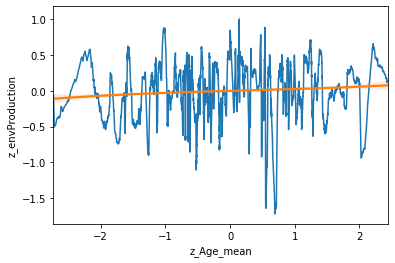

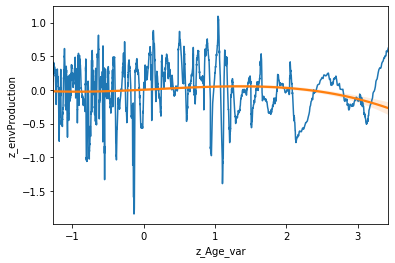

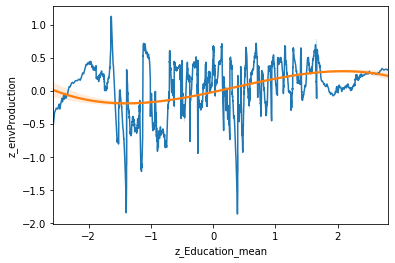

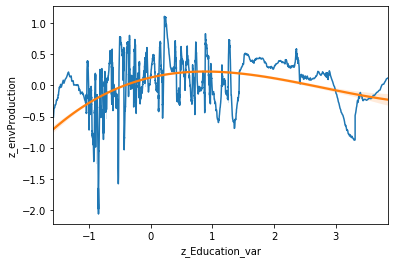

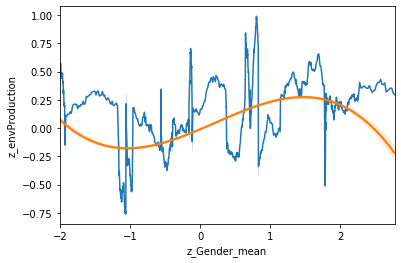

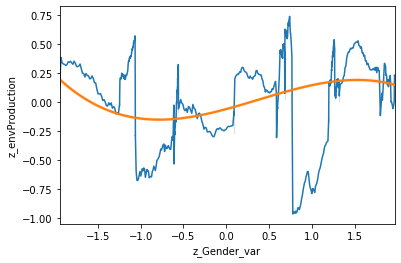

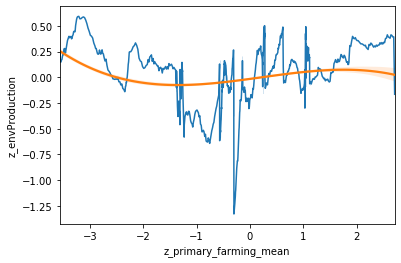

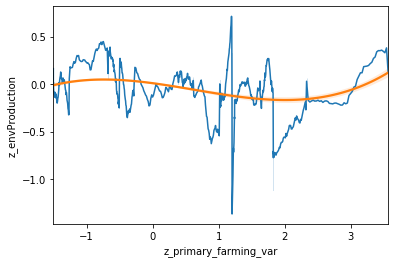

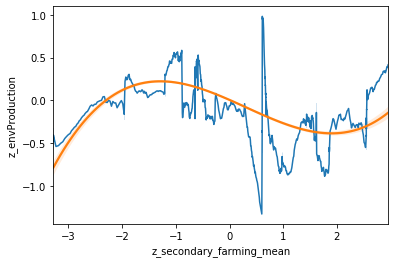

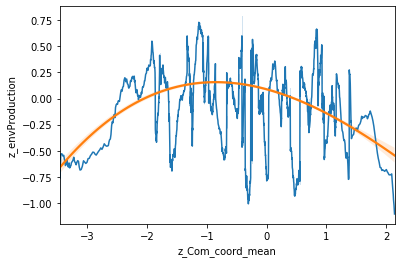

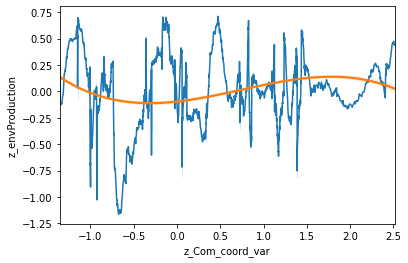

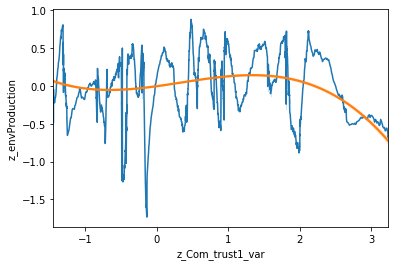

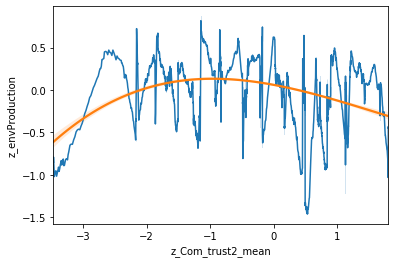

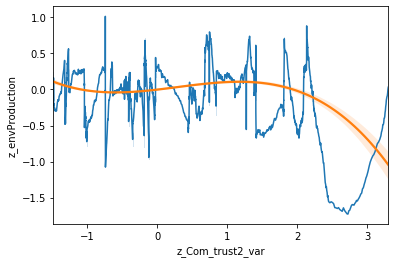

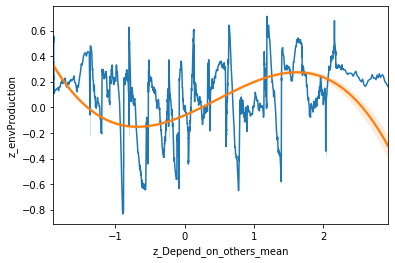

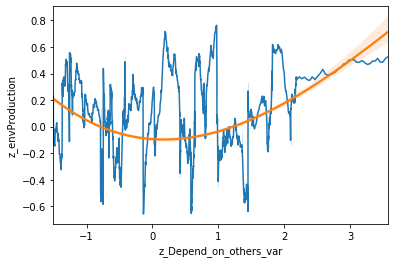

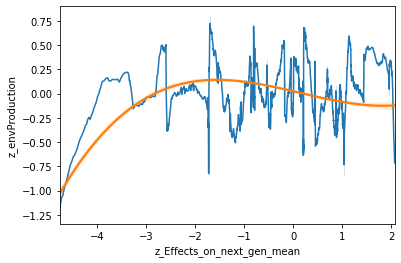

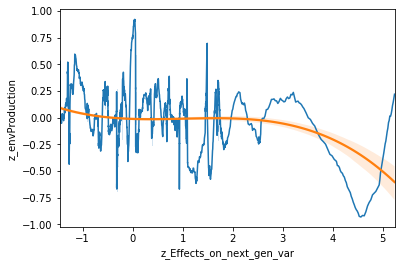

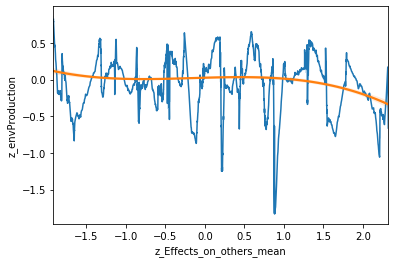

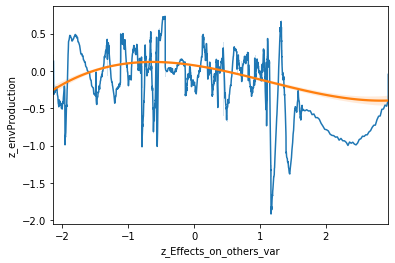

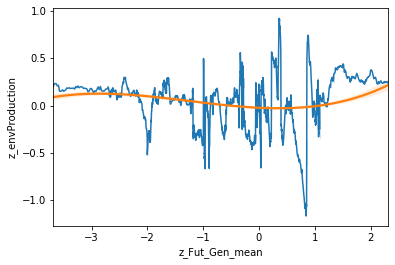

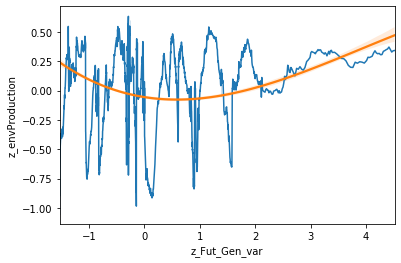

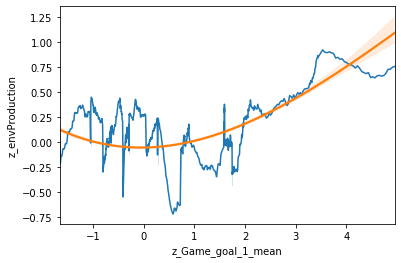

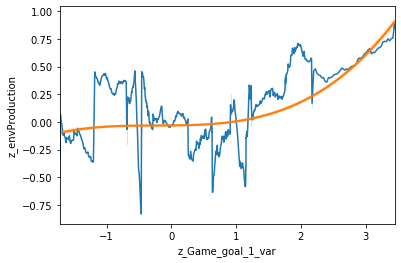

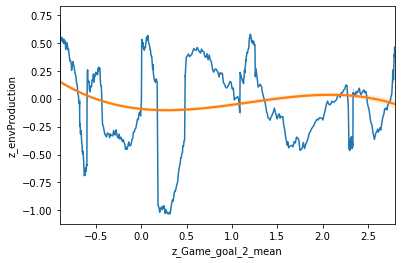

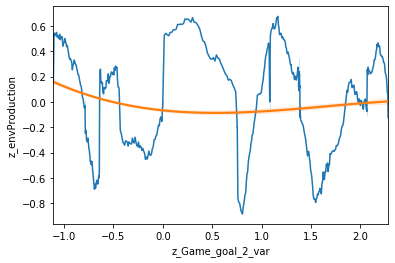

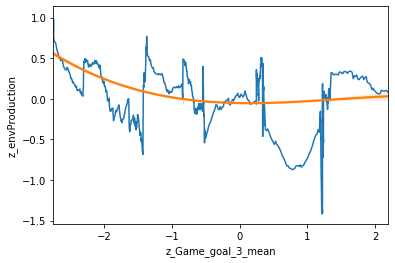

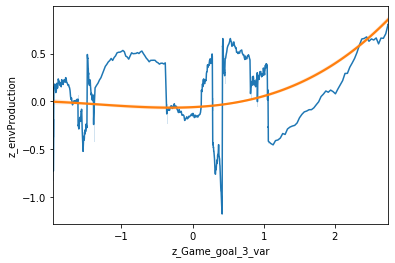

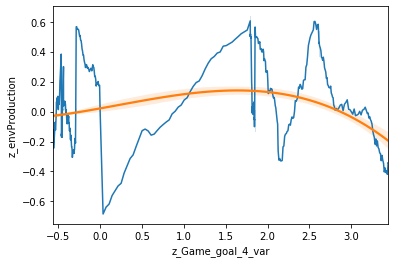

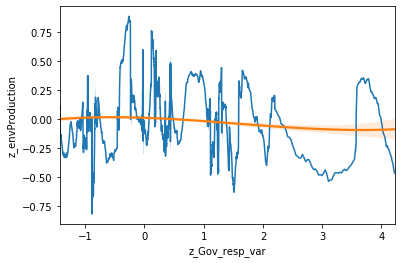

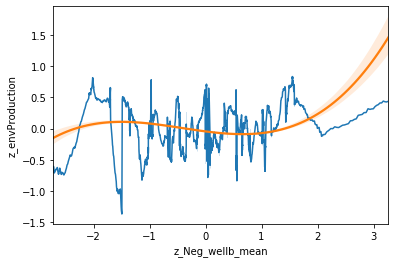

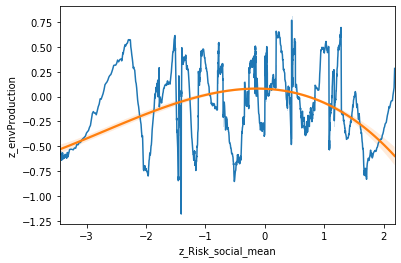

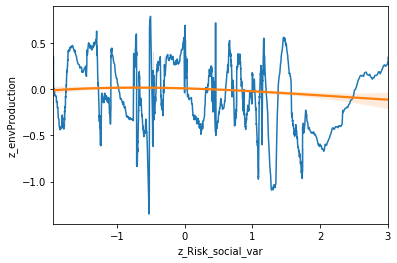

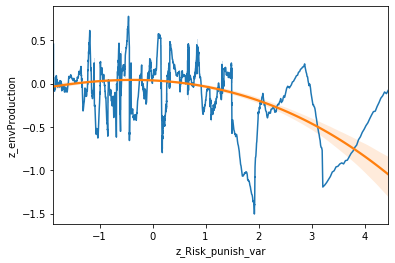

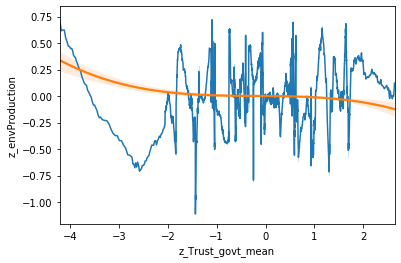

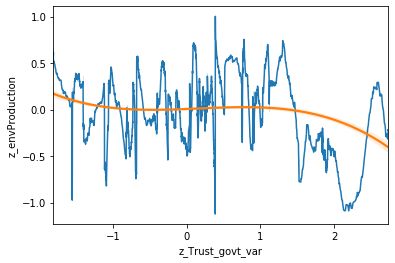

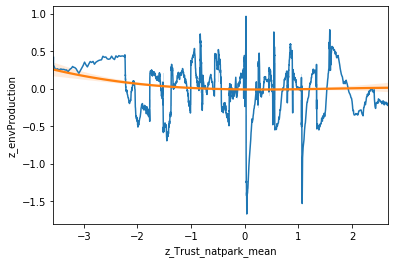

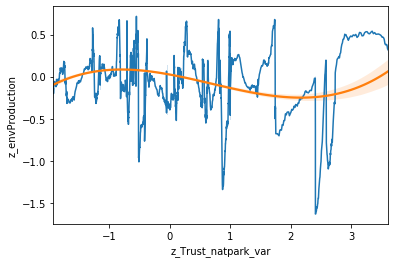

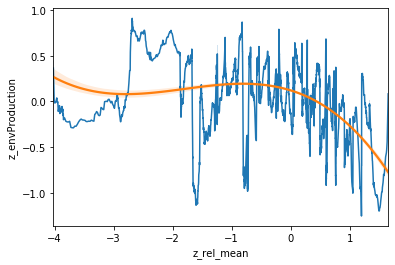

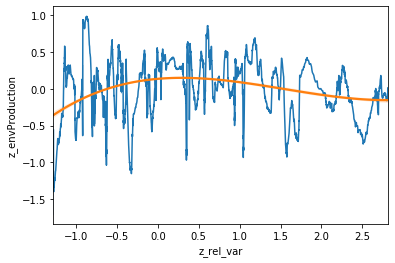

In [26]:
for var in explanatory_var:
    df = data[[var, response_var]].sort_values(by=var).rolling(window=50, min_periods=1).mean()
    sns.lineplot(x=var, y=response_var, data=df)
    sns.regplot(x=var, y=response_var, data=df, fit_reg=True, order=3, scatter=False)
    plt.show()

## Country-wise distributions of explanatory variable

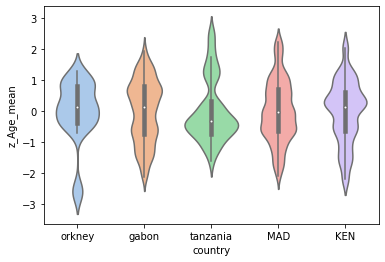

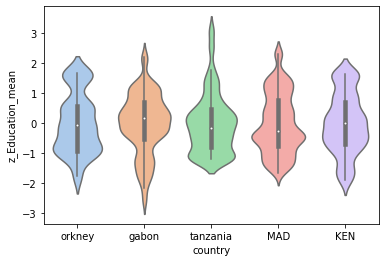

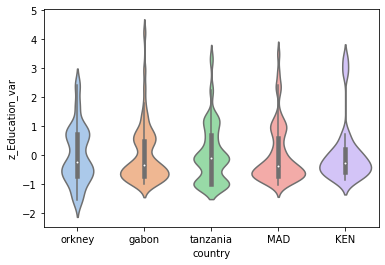

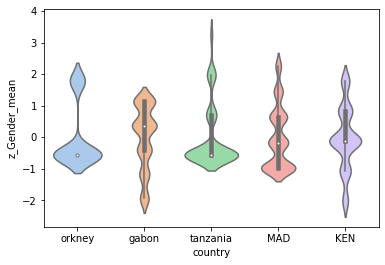

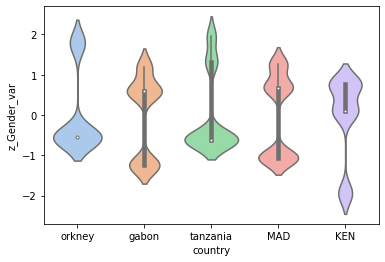

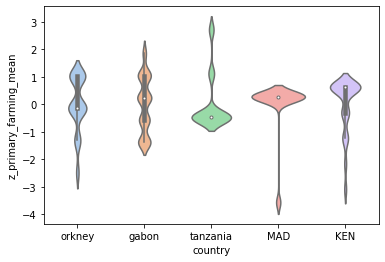

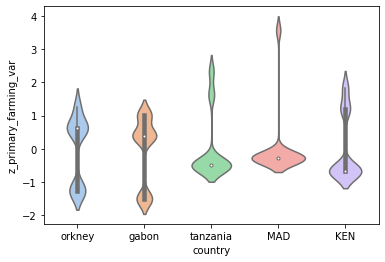

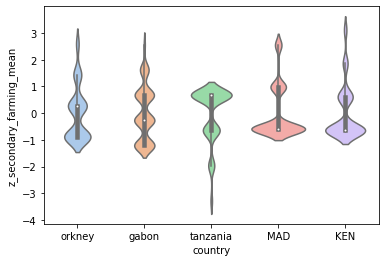

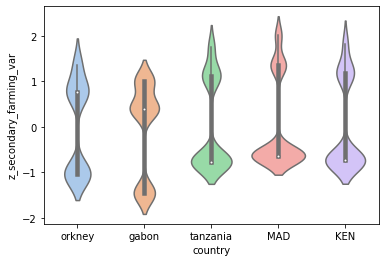

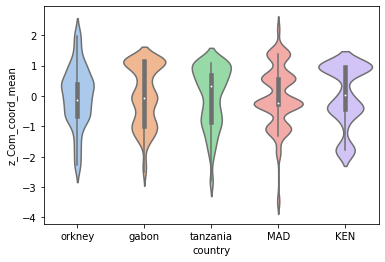

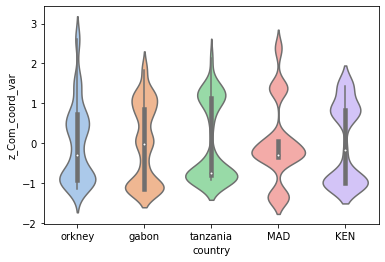

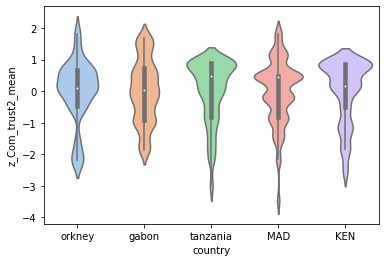

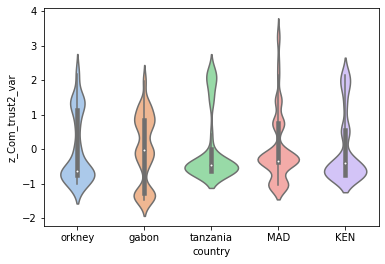

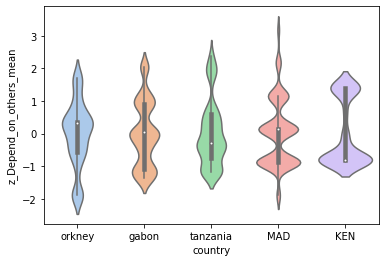

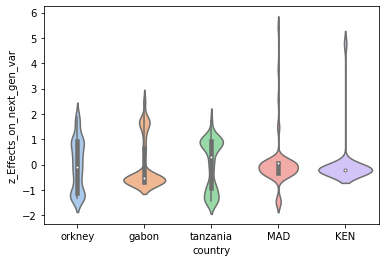

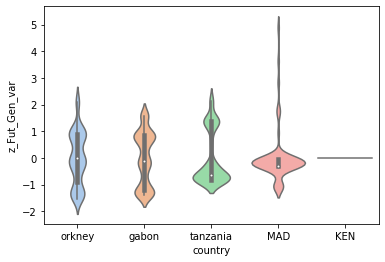

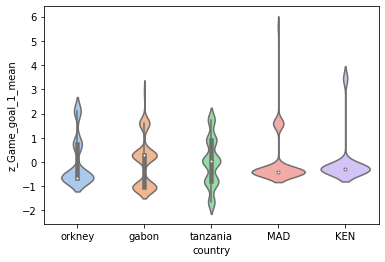

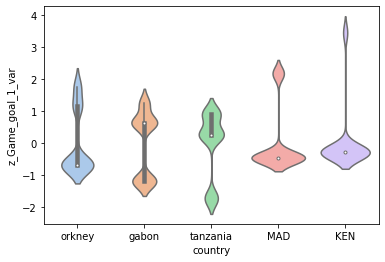

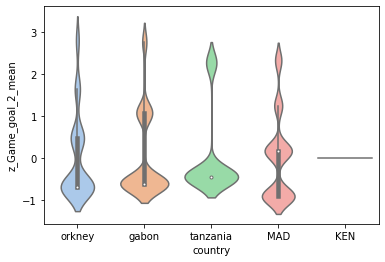

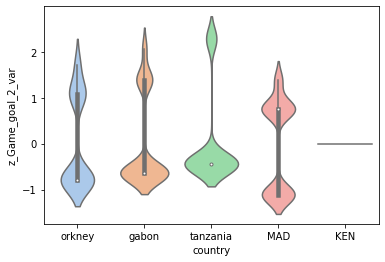

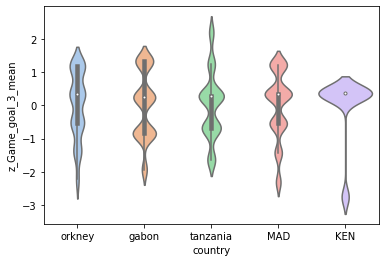

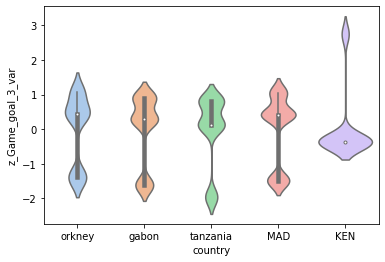

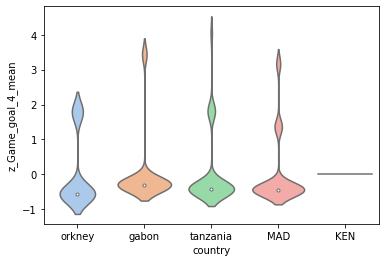

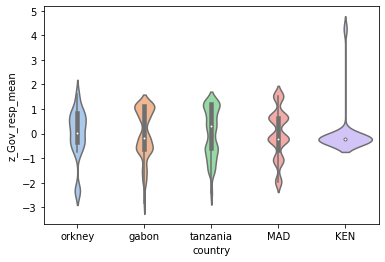

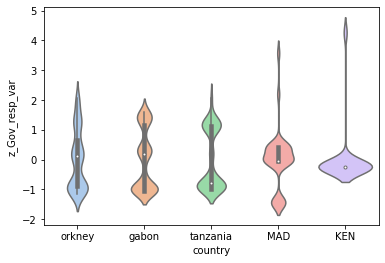

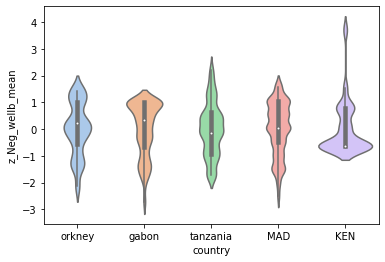

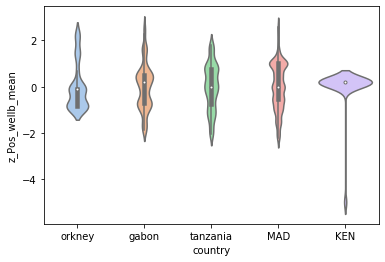

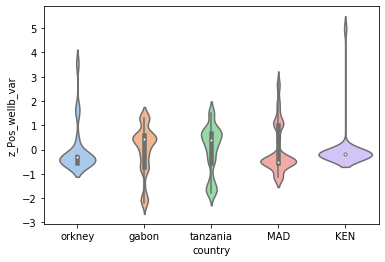

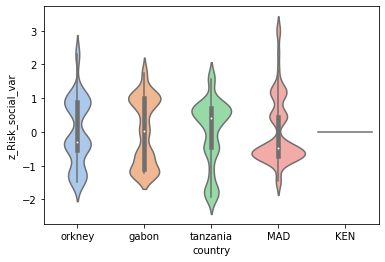

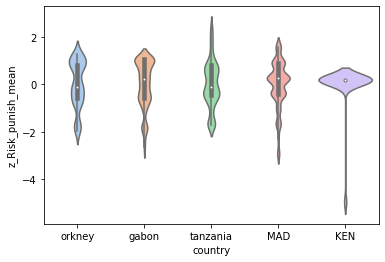

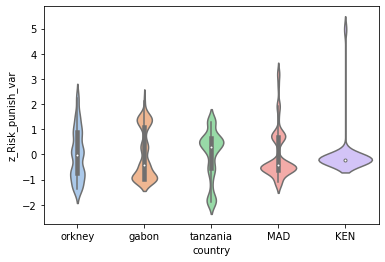

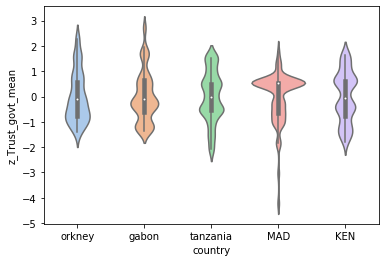

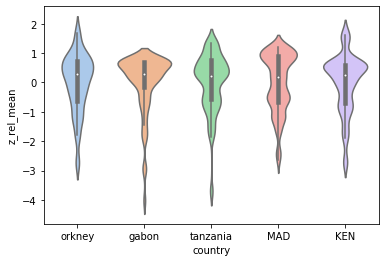

In [27]:
for var in explanatory_var:
    #df = data[[var, 'country']].groupby('country').boxplot(figsize=(12,4), layout=(1,7))
    sns.violinplot('country', var, data=data, palette='pastel')
    plt.show()

In [28]:
"""from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(data[explanatory_var])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf.loc[:, 'principal component 1'],
           principalDf.loc[:, 'principal component 2'],
           c = data[response_var], s = 10, cmap='Blues')
ax.grid()"""

"from sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\n\nx = StandardScaler().fit_transform(data[explanatory_var])\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(x)\nprincipalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])\n\nfig = plt.figure(figsize = (8,8))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nax.set_title('2 component PCA', fontsize = 20)\nax.scatter(principalDf.loc[:, 'principal component 1'],\n           principalDf.loc[:, 'principal component 2'],\n           c = data[response_var], s = 10, cmap='Blues')\nax.grid()"

In [29]:
"""# calculating beta coefficients from coefficients
beta_coef = []
for var in results.params.index.values[1:]:
    beta_coef.append(results.params[var]*(data[var].std(ddof=0)/data[response_var].std(ddof=0)))
beta_coef = pd.DataFrame({'params':results.params.index.values[1:], 'coefs':beta_coef}).sort_values('coefs', ascending=False)
plt.figure(figsize=(20,5))
plt.bar('params', 'coefs', data=beta_coef)
plt.xticks(rotation=90)
plt.show()"""

"# calculating beta coefficients from coefficients\nbeta_coef = []\nfor var in results.params.index.values[1:]:\n    beta_coef.append(results.params[var]*(data[var].std(ddof=0)/data[response_var].std(ddof=0)))\nbeta_coef = pd.DataFrame({'params':results.params.index.values[1:], 'coefs':beta_coef}).sort_values('coefs', ascending=False)\nplt.figure(figsize=(20,5))\nplt.bar('params', 'coefs', data=beta_coef)\nplt.xticks(rotation=90)\nplt.show()"